<a href="https://colab.research.google.com/github/Graceyong1020/ai_work2/blob/master/mnistcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader # DataLoader: 데이터셋을 미니배치 단위로 분할해 지정한 데이터셋을 반복할 수 있도록 해주는 클래스
import torch.nn.init

In [6]:
input=torch.Tensor(1,1,28,28) #batch size(한번에 로딩하는 이미지 수), channel, width, height
print(input.size())
print(input)


torch.Size([1, 1, 28, 28])
tensor([[[[ 3.3631e-44,  4.3719e-41,  4.6428e-36,  4.3721e-41,  2.8026e-45,
            9.8091e-45,  0.0000e+00,  0.0000e+00,  1.4013e-45,  0.0000e+00,
            1.4013e-45,  7.0065e-45,  3.3631e-44,  3.0922e-41, -1.4891e+26,
            4.3719e-41,  1.4013e-45,  0.0000e+00,  1.4013e-45,  7.0065e-45,
            1.4013e-45,  8.4078e-45,  1.4013e-45,  1.5414e-44,  2.9427e-44,
            2.8026e-44,  5.1161e-35,  3.0922e-41],
          [-1.0997e+26,  4.3719e-41,  1.4013e-45,  7.0065e-45,  1.4013e-45,
            8.4078e-45,  1.4013e-45,  2.5223e-44,  5.6052e-45,  0.0000e+00,
            5.1161e-35,  3.0922e-41,  5.1162e-35,  3.0922e-41,  5.1162e-35,
            3.0922e-41,  5.1162e-35,  3.0922e-41,  5.1162e-35,  3.0922e-41,
            2.8026e-44,  0.0000e+00,  4.4141e-36,  4.3721e-41,  0.0000e+00,
            0.0000e+00,  5.1161e-35,  3.0922e-41],
          [ 1.4013e-45,  2.6625e-44,  1.4013e-45,  2.8026e-44,  2.8026e-44,
            4.3719e-41,  4.4141e-36

In [7]:
conv1 = nn.Conv2d(1, 32, 3, padding=1) #stride 생략하면 1
#Conv2d(input channel number, output channel number, kernel size, stride=1, padding=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [8]:
conv2=nn.Conv2d(32, 64, 3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [9]:
pool=nn.MaxPool2d(2) #kernel size=2, stride=kernel size
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [10]:
out1=conv1(input)
out2=pool(out1)
print(out1.size())
print(out2.size())

torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])


In [11]:
out3=conv2(out2)
out4=pool(out3)
print(out3.size())
print(out4.size())

torch.Size([1, 64, 14, 14])
torch.Size([1, 64, 7, 7])


In [12]:
# Fully connected layer

out=out4.view(out4.size(0), -1) #flatten. 1차원으로 펼침
print(out.size()) #batch size, width*height*channel

torch.Size([1, 3136])


In [13]:
fc=nn.Linear(3136, 10) #input size, output size (10개의 class)
out=fc(out)
print(out.size()) #batch size, class number

torch.Size([1, 10])


In [16]:
device='cuda' if torch.cuda.is_available() else 'cpu' #device 설정 -> cuda 사용 가능하면 cuda, 아니면 cpu

""" device=''
if torch.cuda.is_available:
    device='cuda'
else:
    device='cpu' """

torch.manual_seed(777) #random seed 고정 -> 같은 결과를 얻기 위해

if device == 'cuda':
    torch.cuda.manual_seed_all(777) #cuda에서도 같은 결과를 얻기 위해
print(device)

cuda


In [17]:
learning_rate=0.001
epochs=15
batch_size=100


In [18]:
mnist_train=dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(),
                        download=True) #train data
mnist_test=dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(),
                        download=True) #test data



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.2MB/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.65MB/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [19]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [20]:
train_loader=DataLoader(dataset=mnist_train,
                       batch_size=batch_size,
                       shuffle=True,
                        drop_last=False) #shuffle: 데이터를 섞어서 불러옴. drop_last: 마지막 배치를 버릴지 여부

test_loader=DataLoader(dataset=mnist_test,
                        batch_size=batch_size,
                        shuffle=False,
                        drop_last=False)

In [21]:
for X, Y in train_loader:
    print(X.size())
    print(Y.size())

torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([1

In [22]:
for X, Y in test_loader:
    print(X.size())
    print(Y.size())
    break
for X, Y in test_loader:
    print(X.size())
    print(Y.size())
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])


In [23]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #conv layer1
        #image in shape=(100, 1, 28, 28)
        #conv -> (?, 32, 28, 28)
        #pool -> (?, 32, 14, 14)

        self.layer1=nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2) #kernel size=2, stride=2
        )

        #conv layer2
        #image in shape=(?, 32, 14, 14)
        #conv -> (?, 64, 14, 14)
        #pool -> (?, 64, 7, 7)
        self.layer2=nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        #fully connected layer
        #image in shape=(?, 64, 7, 7) -> (100, 3136) 1차원으로 펼침
        self.fc=nn.Linear(64*7*7, 10, bias=True) #10개의 class
        #완전 연결층 한정으로 가중치 초기화
        nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
            out=self.layer1(x)
            out=self.layer2(out)
            out=out.view(out.size(0), -1)
            out=self.fc(out)
            return out

In [24]:
model=CNN().to(device)
criterion=nn.CrossEntropyLoss().to(device) #loss function
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate) #optimizer

In [25]:
print(model)
print(list(model.parameters()))

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)
[Parameter containing:
tensor([[[[ 0.2166, -0.1577, -0.1258],
          [ 0.0632, -0.2605,  0.0809],
          [ 0.1567,  0.3265,  0.2777]]],


        [[[-0.1169,  0.2477,  0.2583],
          [ 0.2690, -0.1864, -0.0669],
          [-0.1780,  0.2941,  0.2786]]],


        [[[ 0.2635, -0.0440, -0.2318],
          [-0.1231, -0.0819,  0.0778],
          [ 0.0237,  0.3314, -0.0815]]],


        [[[ 0.3027,  0.2188,  0.0973],
          [ 0.0363, -0.0865, -0.2869],
          [-0.0754,  0.1529,  0.2711]]],


        [[[-0.3294, 

In [26]:
train_total_batch=len(train_loader)
test_total_batch=len(test_loader)
print(train_total_batch)
print(test_total_batch)

600
100


In [27]:
for epoch in range(epochs):
    avg_cost=0

    for X, Y in train_loader:
        X=X.to(device) #device에 데이터를 로드
        Y=Y.to(device)

        optimizer.zero_grad() #optimizer 초기화
        y_hat=model(X) #forward 연산 수행 -> 예측값 계산
        cost=criterion(y_hat, Y)
        cost.backward()
        optimizer.step()

        avg_cost+=cost/train_total_batch #cost 계산
    print('Epoc:', epoch, 'cost:', avg_cost)

Epoc: 0 cost: tensor(0.2315, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 1 cost: tensor(0.0655, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 2 cost: tensor(0.0481, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 3 cost: tensor(0.0384, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 4 cost: tensor(0.0318, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 5 cost: tensor(0.0276, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 6 cost: tensor(0.0228, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 7 cost: tensor(0.0199, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 8 cost: tensor(0.0168, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 9 cost: tensor(0.0142, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 10 cost: tensor(0.0125, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 11 cost: tensor(0.0104, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 12 cost: tensor(0.0093, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 13 cost: tensor(0.0086, device='cuda:0', grad_fn=<AddBackward0>)
Epoc: 14 cost: t

In [28]:
with torch.no_grad():
    avg_accuracy=0

    for X,Y in test_loader:
        X=X.to(device)
        Y=Y.to(device)
        pred=model(X)
        correct_pred=torch.argmax(pred, -1)==Y
        accuracy=correct_pred.float().sum()
        avg_accuracy+=accuracy
    avg_accuracy=avg_accuracy/test_total_batch
print('Accuracy:', avg_accuracy)

Accuracy: tensor(98.9200, device='cuda:0')


# 새 섹션

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# 데이터셋 변환 정의
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 이미지를 텐서로 변환하고 -1 ~ 1 사이로 정규화

# CIFAR-10 데이터셋 로드
cifar10_train = dsets.CIFAR10(root='cifar10_data/', train=True, transform=transform, download=True)
cifar10_test = dsets.CIFAR10(root='cifar10_data/', train=False, transform=transform, download=True)

trainloader = DataLoader(cifar10_train, batch_size=100, shuffle=True, num_workers=2)
testloader = DataLoader(cifar10_test, batch_size=100, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:03<00:00, 43.1MB/s]


Extracting cifar10_data/cifar-10-python.tar.gz to cifar10_data/
Files already downloaded and verified


In [32]:
# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # layer1: conv
        self.pool = nn.MaxPool2d(2, 2)               # layer1: pool
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) # layer2: conv
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1) # layer3: conv
        self.fc1 = nn.Linear(128 * 4 * 4, 256)       # fully connected layer
        self.fc2 = nn.Linear(256, 128)               # fully connected layer
        self.fc3 = nn.Linear(128, 10)                # output layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # layer1: conv -> pool
        x = self.pool(F.relu(self.conv2(x)))  # layer2: conv -> pool
        x = self.pool(F.relu(self.conv3(x)))  # layer3: conv -> pool
        x = x.view(-1, 128 * 4 * 4)           # flatten
        x = F.relu(self.fc1(x))               # fully connected layer
        x = F.relu(self.fc2(x))               # fully connected layer
        x = self.fc3(x)                       # output layer
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = CNN().to(device)

In [33]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [34]:
# 모델 학습
num_epochs = 10  # 학습 에포크 수 증가
for epoch in range(num_epochs):  # 데이터셋을 여러 번 반복
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력 데이터
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # 변화도 매개변수를 0으로 설정
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 200 == 199:    # 매 200 미니배치마다
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')


[1,   200] loss: 1.780
[1,   400] loss: 1.410
[2,   200] loss: 1.175
[2,   400] loss: 1.035
[3,   200] loss: 0.885
[3,   400] loss: 0.848
[4,   200] loss: 0.724
[4,   400] loss: 0.710
[5,   200] loss: 0.595
[5,   400] loss: 0.600
[6,   200] loss: 0.491
[6,   400] loss: 0.512
[7,   200] loss: 0.405
[7,   400] loss: 0.431
[8,   200] loss: 0.320
[8,   400] loss: 0.355
[9,   200] loss: 0.254
[9,   400] loss: 0.282
[10,   200] loss: 0.204
[10,   400] loss: 0.220
Finished Training


In [35]:
# 모델 평가 및 혼동 행렬 작성
all_preds = []
all_labels = []

with torch.no_grad():
    avg_accuracy = 0
    test_total_batch = len(testloader)

    for X, Y in testloader:
        X, Y = X.to(device), Y.to(device)
        pred = net(X)
        correct_pred = torch.argmax(pred, -1) == Y
        accuracy = correct_pred.float().sum()
        avg_accuracy += accuracy

        all_preds.extend(torch.argmax(pred, -1).cpu().numpy())
        all_labels.extend(Y.cpu().numpy())

    avg_accuracy = avg_accuracy / (test_total_batch * testloader.batch_size)
    print('Accuracy:', avg_accuracy.item())


Accuracy: 0.745199978351593


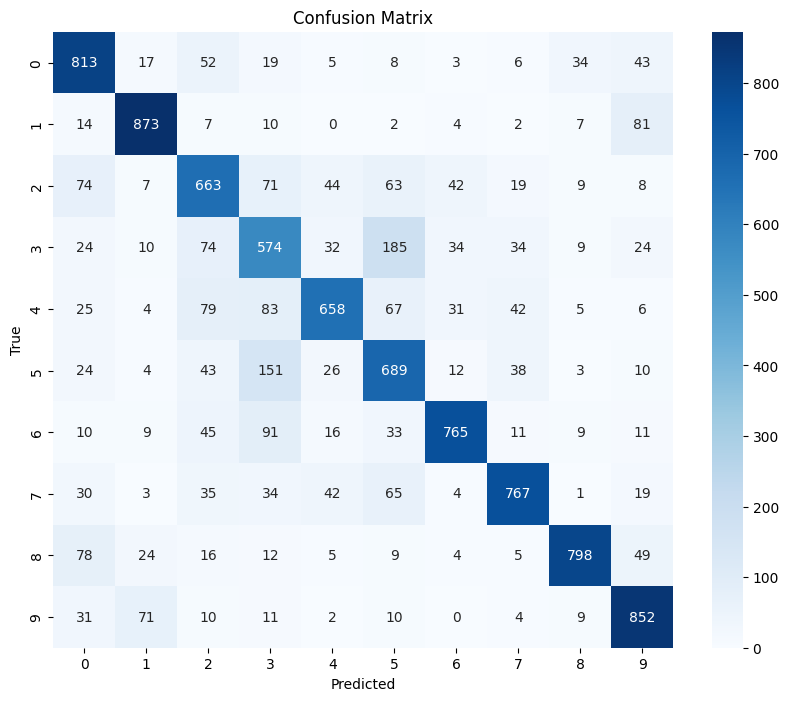

In [36]:
# 혼동 행렬 작성
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()